<a href="https://colab.research.google.com/github/binit-13/Machine-Learning-Notes/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, Dropout, Input, UpSampling2D
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras.optimizers import SGD

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.astype('float32')/X_train.max()
X_test = X_test.astype('float32')/X_test.max()

In [4]:
import collections

def label_count(Y,y):
  cnt_label_train = dict(collections.Counter(Y))
  cnt_label_test = dict(collections.Counter(y))
  df_train = pd.DataFrame(cnt_label_train.values(),columns=['values'],index=cnt_label_train.keys())
  df_test = pd.DataFrame(cnt_label_test.values(),columns=['values'],index=cnt_label_test.keys())


  fig,axs = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(10,5))
  axs[0].bar(df_train.index,height=df_train['values'].squeeze(), align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
  axs[1].bar(df_test.index,height=df_test['values'].squeeze(), align='center', color = 'b', alpha=0.75, width = 0.41, label='Training')

  plt.xlabel('Labels')
  plt.xticks((0,1,2,3,4,5,6,7,8,9))
  plt.ylabel('Count')
  fig.suptitle('Label distribution in the training and test set')
  axs[0].legend(),axs[1].legend()
  axs[0].grid(True),axs[1].grid(True)
  plt.show()

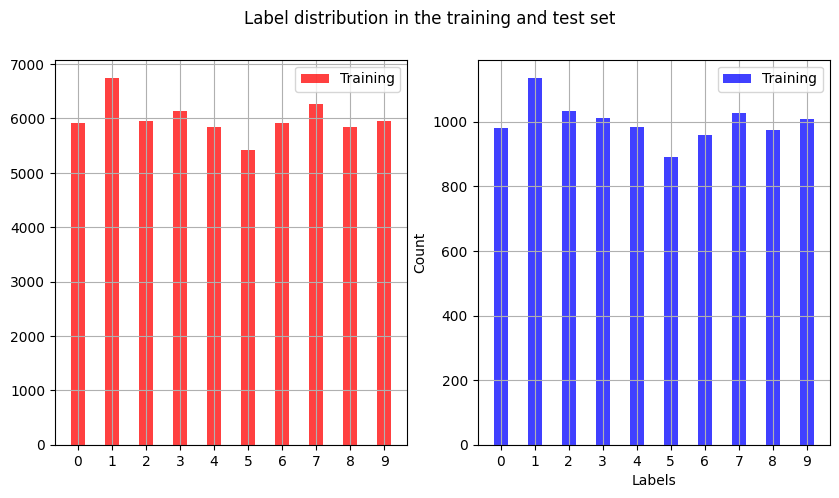

In [ ]:
label_count(y_train,y_test)

## Logistic Regression & Random Forest

In [ ]:
## Aplying logistic regession
import random
def algo_mnist(X,x,Y,y,model=['Lg','Rf'],max_iter=None,comp=400):
  XX = X.reshape(X.shape[0],28*28)
  xx = x.reshape(x.shape[0],28*28)

  pca = PCA(n_components=comp)
  X = pca.fit_transform(XX)
  x = pca.transform(xx)
  if model == 'Lg':
    clf = LogisticRegression(multi_class='multinomial',
                        #penalty='l2', #ridge regression
                        solver='lbfgs',
                        max_iter=max_iter)
    clf.fit(X,Y)

    y_pred = clf.predict(x)
    cm = confusion_matrix(y,y_pred)
    print(y_pred.shape, accuracy_score(y,y_pred))

    ##figure for acutal vs predcited
    plt.figure(figsize=(20,4))
    for i in range(0,5):
      ax = plt.subplot(2,5, i+1)
      r = random.randint(1,10000)
      plt.imshow(xx[r].reshape(28,28))
      plt.title(f'Sample:{r} Predict:{y_pred[r]}', fontsize = 10)

    ## confusion matrix heatmap
    plt.figure(figsize=(12,10))
    sns.heatmap(cm,cmap='Blues_r',annot=True, linewidths=0.5,fmt='0.4g')
    plt.title('Confusion matrix', fontsize=25)
    plt.show()

    ## how logistic regression made a distinction
    coef = clf.coef_.copy()
    scale = np.abs(coef).max()
    plt.figure(figsize=(10,5))

    for i in range(10): # 0-9
        coef_plot = plt.subplot(2, 5, i + 1)
        coef_plot.imshow(coef[i].reshape(20,20), cmap=plt.cm.RdBu, vmin=-scale, vmax=scale, interpolation='bilinear')
        coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
        coef_plot.set_xlabel(f'Class {i}')

    plt.suptitle('Coefficients for various classes')

  if model=='Rf':
    clf = RandomForestClassifier(n_estimators=500,max_depth=7)
    clf.fit(XX,Y)

    y_pred = clf.predict(xx)
    cm = confusion_matrix(y,y_pred)
    print(accuracy_score(y,y_pred))

    plt.figure(figsize=(20,4))
    for i in range(0,5):
      ax = plt.subplot(2,5, i+1)
      r = random.randint(1,10000)
      plt.imshow(xx[r].reshape(28,28))
      plt.title(f'Sample:{r} Predict:{y_pred[r]}', fontsize = 10)

    ## confusion matrix heatmap
    plt.figure(figsize=(12,10))
    sns.heatmap(cm,cmap='Blues_r',annot=True, linewidths=0.5,fmt='0.4g')
    plt.title('Confusion matrix', fontsize=25)
    plt.show()


## Random Forest didn't perform as expected

(10000,) 0.9252


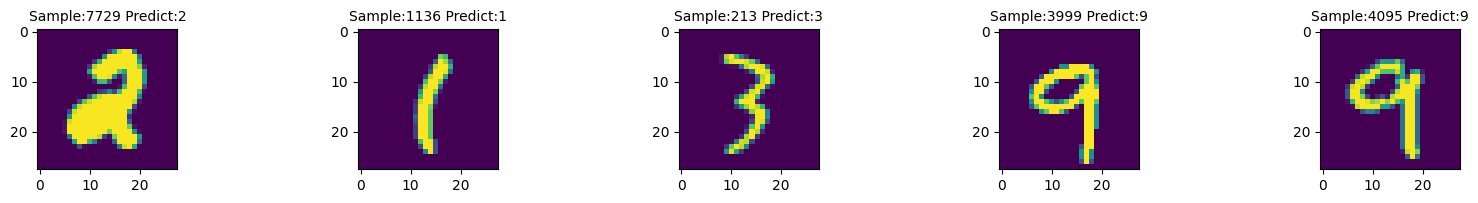

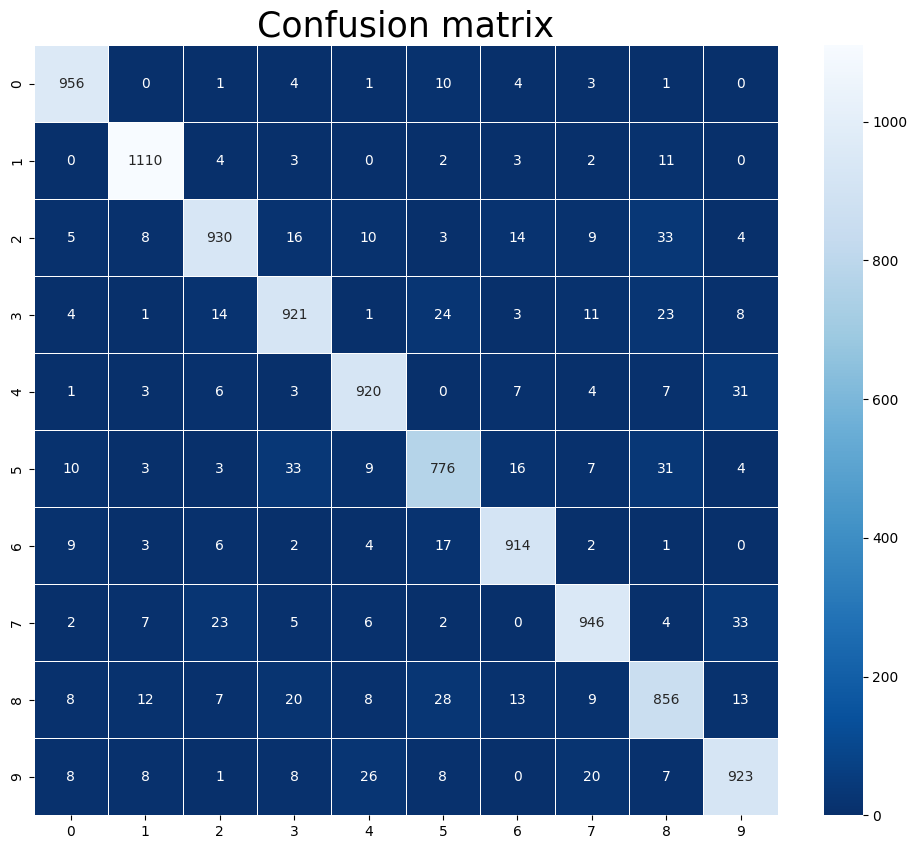

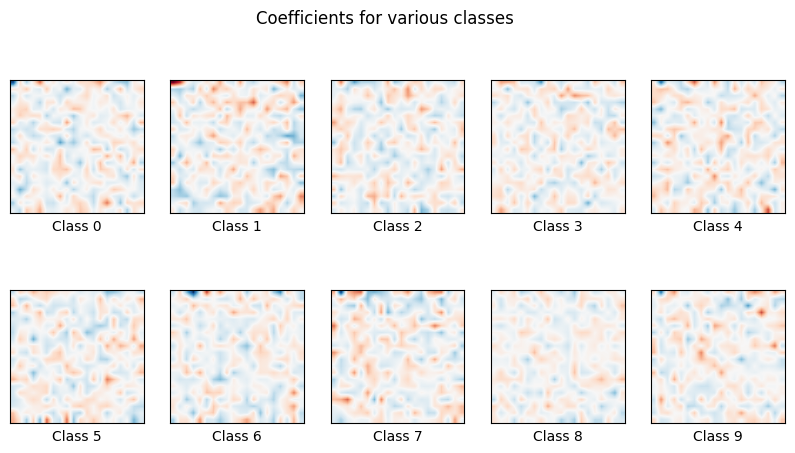

In [ ]:
algo_mnist(X_train,X_test,y_train,y_test,model='Lg',max_iter=400)

## Convolutional Neural Network (CNN)

In [ ]:
## Through Deep Learning First using CNN and then Autoencoders
X_train_trans = X_train.reshape(X_train.shape[0],28,28,1)
X_test_trans = X_test.reshape(X_test.shape[0],28,28,1)

y_train_trans = to_categorical(y_train)
y_test_trans = to_categorical(y_test)

In [ ]:
model = Sequential()
## Adding Convolution Feature layer of 3 by 3 to extract feature
model.add(Conv2D(32, kernel_size = (3,3),activation='relu', kernel_initializer='he_uniform',input_shape=(28,28,1)))
## Maxpooling for retaining most prominent feature
model.add(MaxPooling2D(2,2))
## Flattening to pass the data to Normal ANN layer
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
history = model.fit(X_train_trans, y_train_trans, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2449 - accuracy: 0.9240 - val_loss: 0.0736 - val_accuracy: 0.9796
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0916 - accuracy: 0.9725 - val_loss: 0.0613 - val_accuracy: 0.9819
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0548 - val_accuracy: 0.9842
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0474 - accuracy: 0.9844 - val_loss: 0.0536 - val_accuracy: 0.9835
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0501 - val_accuracy: 0.9869
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0276 - accuracy: 0.9907 - val_loss: 0.0534 - val_accuracy:

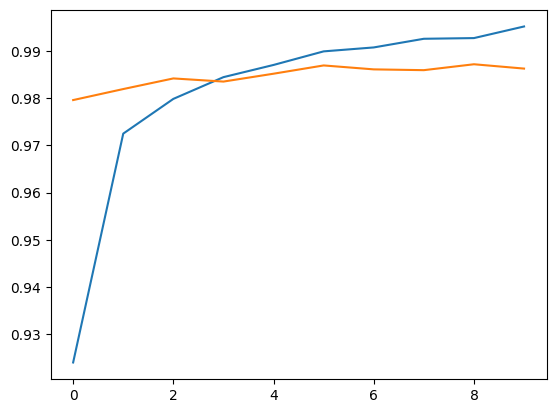

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
## Prediction
def predict_dt(idx):
  plt.imshow(X_test[idx])
  plt.show()
  predict = model.predict(X_test[idx].reshape(1,28,28)).argmax(axis=1)

  return predict


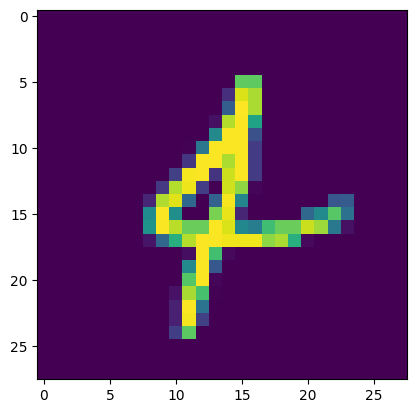

1/1 [==============================] - 0s 49ms/step


array([4])

In [ ]:
predict_dt(300)

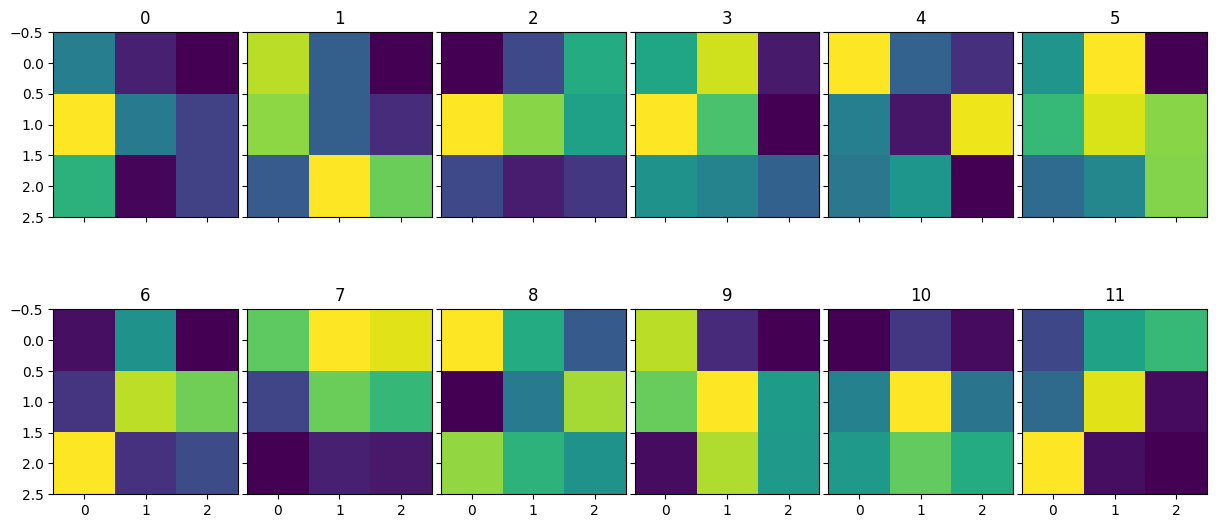

In [ ]:
def feature_visual(feature_num):
  ## since we have only one convo layer so layer is 0 we get 32 filters of 3 by 3 matrix
  filter, bias = model.layers[0].get_weights()
  ## normalize filter values to 0-1 to visualize
  f_min, f_max = filter.min(), filter.max()
  filter = (filter-f_min)/(f_max-f_min)

  fig, axs = plt.subplots(2,int(feature_num/2), figsize=(15, 6), facecolor='w', edgecolor='k',sharex=True, sharey=True)
  fig.subplots_adjust(hspace = .5, wspace=.001)
  axs = axs.ravel()
  ## should be less than 32
  for i in range(feature_num):
    axs[i].imshow(filter[:,:,:,i])
    axs[i].set_title(str(i))

feature_visual(12)

In [ ]:
# define cnn model, this performed little less than our earlier CNN model with optimizer adam and applying dropout to avoid overfitting
def define_model():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
  # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
  return scores, histories

# summarize model performance
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  # box and whisker plots of results
  plt.boxplot(scores)
  plt.show()


## AutoEncoders

In [21]:
def Autoencoder(X,x):
  X_train_trans = X_train.reshape(X.shape[0],28*28)
  X_test_trans = X_test.reshape(x.shape[0],28*28)

  Input_model = Input(shape=(784,))
  Encoded_layer = Dense(128, activation='relu')(Input_model)
  Encoded_layer = Dense(64, activation='relu')(Encoded_layer)
  Bottleneck_layer = Dense(32, activation='relu')(Encoded_layer)
  Decoded_layer = Dense(64, activation='relu')(Bottleneck_layer)
  Decoded_layer = Dense(128, activation='relu')(Decoded_layer)
  Decoded_layer = Dense(784, activation='sigmoid')(Decoded_layer)

  Autoencoder_model = Model(Input_model, Decoded_layer)

  Autoencoder_model.summary()

  Autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

  history = Autoencoder_model.fit(X_train_trans, X_train_trans,
                      batch_size=256,
                      epochs=10,
                      shuffle=True,
                      validation_data=(X_test_trans, X_test_trans))

  decoded_imgs = Autoencoder_model.predict(X_test_trans)

  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Autoencoder Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Autoencoder Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.tick_params(axis='y',labelleft='off',which='both', labelright='on')
  plt.legend(['Train', 'Test'], loc='upper left')

  plt.show()


  n=5
  plt.figure(figsize=(20, 4))
  for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(x[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Normal Images')

    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(decoded_imgs[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed Images')

  plt.show()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_32 (Dense)            (None, 128)               100480    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 64)                2112      
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dense_37 (Dense)            (None, 784)               1011

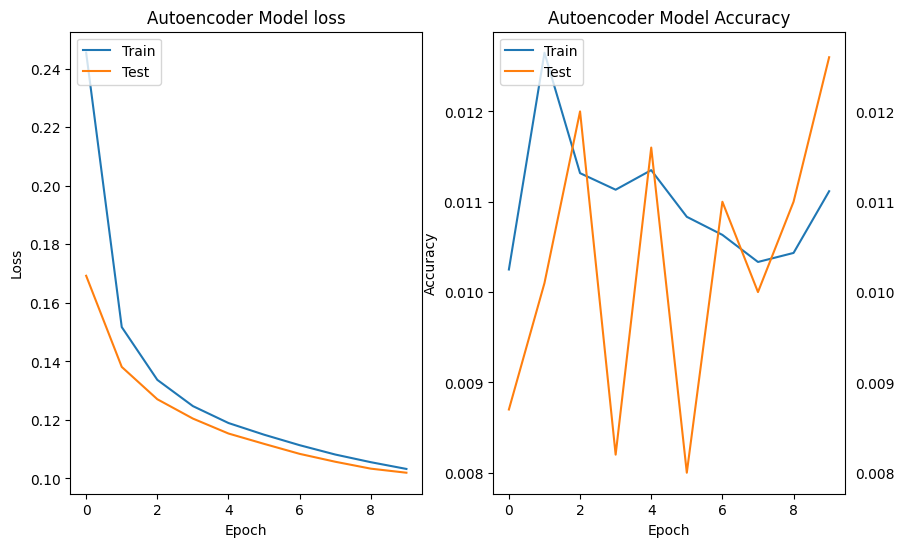

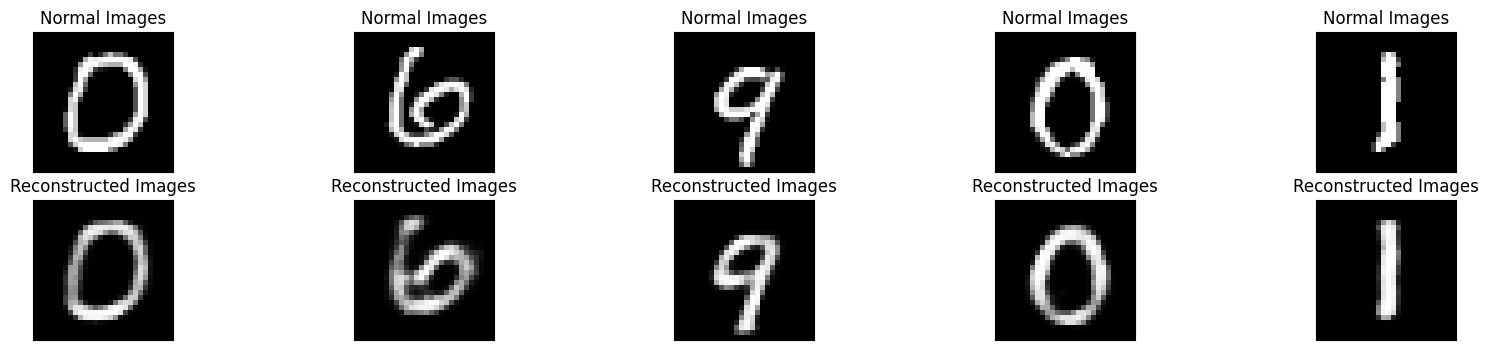

In [22]:
Autoencoder(X_train,X_test)

## Convolutional Autoencoder

In [41]:
def Autoencoder_cnn(X,x):
  X_train_trans = X_train.reshape(X.shape[0],28,28,1)
  X_test_trans = X_test.reshape(x.shape[0],28,28,1)

  input_img = Input(shape=(28, 28, 1))

  cnn_layer_enco = Conv2D(16, (3, 3), activation='relu',padding='same')(input_img)
  cnn_layer_enco = MaxPooling2D((2, 2),padding='same')(cnn_layer_enco)
  cnn_layer_enco = Conv2D(8, (3, 3), activation='relu',padding='same')(cnn_layer_enco)
  cnn_layer_enco = MaxPooling2D((2, 2),padding='same')(cnn_layer_enco)

  cnn_layer_deco = Conv2D(8, (3, 3), activation='relu',padding='same')(cnn_layer_enco)
  cnn_layer_deco = UpSampling2D((2, 2))(cnn_layer_deco)
  cnn_layer_deco = Conv2D(16, (3, 3), activation='relu',padding='same')(cnn_layer_deco)
  cnn_layer_deco = UpSampling2D((2, 2))(cnn_layer_deco)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(cnn_layer_deco)

  auto_Enco = Model(input_img, decoded)
  auto_Enco.summary()
  auto_Enco.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

  history = auto_Enco.fit(X_train_trans, X_train_trans,
                      batch_size=256,
                      epochs=10,
                      shuffle=True,
                      validation_data=(X_test_trans, X_test_trans))

  decoded_imgs = auto_Enco.predict(X_test_trans)

  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Autoencoder Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Autoencoder Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.tick_params(axis='y',labelleft='off',which='both', labelright='on')
  plt.legend(['Train', 'Test'], loc='upper left')

  plt.show()


  n=5
  plt.figure(figsize=(20, 4))
  for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(x[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Normal Images')

    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(decoded_imgs[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed Images')

  plt.show()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 7, 7, 8)           584 

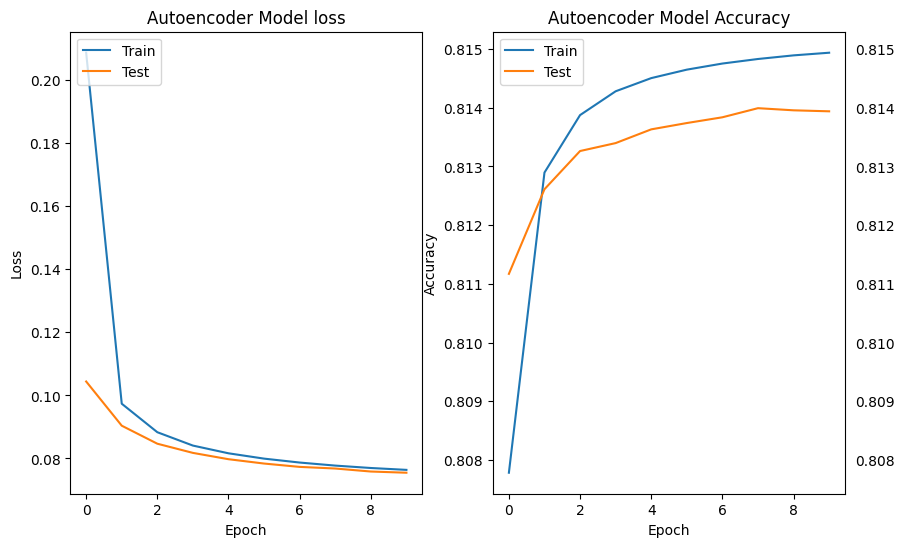

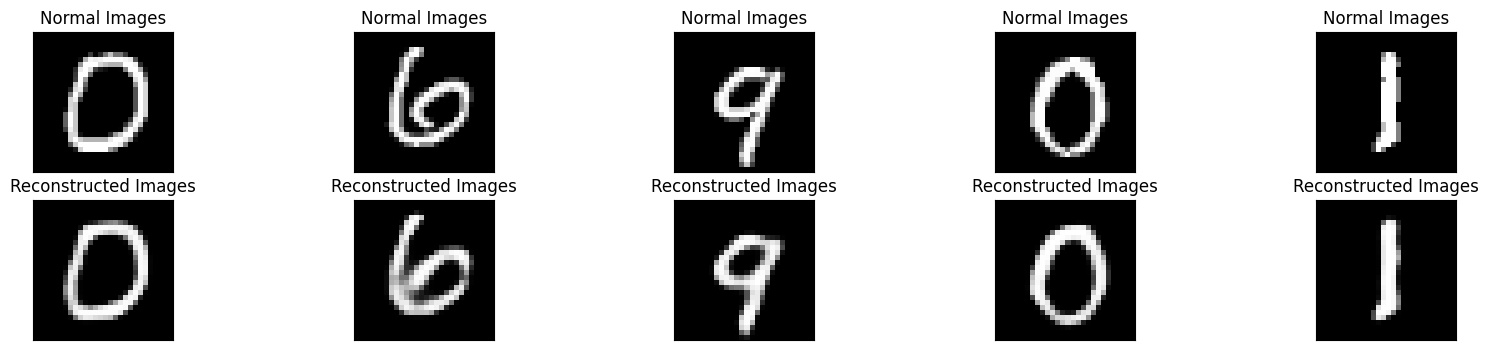

In [42]:
Autoencoder_cnn(X_train,X_test)

Simple CNN performed much better with loss of under 6.